In [349]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import cmath
import seaborn as sns
from copy import deepcopy

In [350]:
f=open("health(2018).csv") # 2018년도 데이터 읽기 
data=csv.reader(f,delimiter=',')

In [351]:
header=next(data)

In [352]:
#각 요소별 데이터 취합
lst_m=[]
lst_f=[]
cnt=0;
for i in range(18):
    lst_m.append([[],[],[]])
    lst_f.append([[],[],[]])
for row in data:
    if(row[8]=='' or row[9]=='' or row[6]=='' or row[7]=='' or row[15]==''):
        continue
    bmi=(float(row[6])/(int(row[5])**2))*10000 # BMI 지수 계산
    eye=(float(row[8])+float(row[9]))/2 # 시력 조사
    if eye>=2.5 or int(row[3])>=18:
        continue;
    cnt+=1
    #데이터 추가
    if(row[2]=='1'):
        lst_m[int(row[3])][0].append(bmi) 
        lst_m[int(row[3])][1].append(eye)
        lst_m[int(row[3])][2].append(int(row[15]))
    else:
        lst_f[int(row[3])][0].append(bmi)
        lst_f[int(row[3])][1].append(eye)
        lst_f[int(row[3])][2].append(int(row[15]))

In [353]:
# 각 나이별로 평균 구하기
for i in range(18):
    if(len(lst_m[i][0])==0):
        lst_m[i][0]=0
    else:
        lst_m[i][0]=sum(lst_m[i][0],0.0)/len(lst_m[i][0])
    if(len(lst_m[i][1])==0):
        lst_m[i][1]=0
    else:
        lst_m[i][1]=sum(lst_m[i][1],0.0)/len(lst_m[i][1])
    if(len(lst_m[i][2])==0):
        lst_m[i][0]=0
    else:
        lst_m[i][2]=sum(lst_m[i][2],0.0)/len(lst_m[i][2])
        
for i in range(18):
    if(len(lst_f[i][0])==0):
        lst_f[i][0]=0
    else:
        lst_f[i][0]=sum(lst_f[i][0],0.0)/len(lst_f[i][0])
    if(len(lst_f[i][1])==0):
        lst_f[i][1]=0
    else:
        lst_f[i][1]=sum(lst_f[i][1],0.0)/len(lst_f[i][1])
    if(len(lst_f[i][2])==0):
        lst_f[i][0]=0
    else:
        lst_f[i][2]=sum(lst_f[i][2],0.0)/len(lst_f[i][2])    

In [354]:
arr=np.array(lst_m)
arr2=np.array(lst_f)

In [355]:
x=arr[5:,0]
y=arr[5:,1]
plt.figure(figsize=(12, 3))
name=[]
for i in range(5,18):
    string=str(i*4)+"~"+str(i*4+4)+"세"
    name.append(string)
age_m=deepcopy(arr[5:,0])
age_f=deepcopy(arr2[5:,0])

<Figure size 864x216 with 0 Axes>

In [356]:
f.close()
f=open("health(2017).csv",encoding="CP949")
# 2017년도 CSV파일 읽기
data=csv.reader(f,delimiter=',')
header=next(data)
lst_m=[]
lst_f=[]
cnt=0;
for i in range(18):
    lst_m.append([[],[],[]])
    lst_f.append([[],[],[]])
for row in data:
    if(row[8]=='' or row[9]=='' or row[6]=='' or row[7]=='' or row[15]==''): # 유효하지 않은 데이터는 버린다.
        continue
    bmi=(float(row[6])/(int(row[5])**2))*10000
    eye=(float(row[8])+float(row[9]))/2
    if eye>=2.5 or int(row[3])>=18:
        continue;
    cnt+=1
    if(row[2]=='1'):
        lst_m[int(row[3])][0].append(bmi)
        lst_m[int(row[3])][1].append(eye)
        lst_m[int(row[3])][2].append(int(row[15]))
    else:
        lst_f[int(row[3])][0].append(bmi)
        lst_f[int(row[3])][1].append(eye)
        lst_f[int(row[3])][2].append(int(row[15]))

## K-means 알고리즘

In [357]:
k=4  # 군집하 할 갯수 설정
arr3=np.vstack([arr[5:],arr2[5:]])
#print(arr3)
for i in range(18):
    if(len(lst_m[i][0])==0):
        lst_m[i][0]=0
    else:
        lst_m[i][0]=sum(lst_m[i][0],0.0)/len(lst_m[i][0])
    if(len(lst_m[i][1])==0):
        lst_m[i][1]=0
    else:
        lst_m[i][1]=sum(lst_m[i][1],0.0)/len(lst_m[i][1])
    if(len(lst_m[i][2])==0):
        lst_m[i][0]=0
    else:
        lst_m[i][2]=sum(lst_m[i][2],0.0)/len(lst_m[i][2])
        
for i in range(18):
    if(len(lst_f[i][0])==0):
        lst_f[i][0]=0
    else:
        lst_f[i][0]=sum(lst_f[i][0],0.0)/len(lst_f[i][0])
    if(len(lst_f[i][1])==0):
        lst_f[i][1]=0
    else:
        lst_f[i][1]=sum(lst_f[i][1],0.0)/len(lst_f[i][1])
    if(len(lst_f[i][2])==0):
        lst_f[i][0]=0
    else:
        lst_f[i][2]=sum(lst_f[i][2],0.0)/len(lst_f[i][2])
arr=np.array(lst_m)
arr2=np.array(lst_f)
arr4=np.vstack([arr[5:],arr2[5:]])
arr5=np.vstack([arr3[:],arr4[:]])

### 초기 k "평균값" (위의 경우 k=3) 은 데이터 오브젝트 중에서 무작위로 뽑힌다. (색칠된 동그라미로 표시됨).

In [358]:
#랜덤 함수로 무작위 초기값 설정
Kmeans_x=np.random.uniform(min(arr5[:,0]),max(arr5[:,0]),k)
Kmeans_y=np.random.uniform(min(arr5[:,2]),max(arr5[:,2]),k)
Kmeans=np.column_stack([Kmeans_x,Kmeans_y])

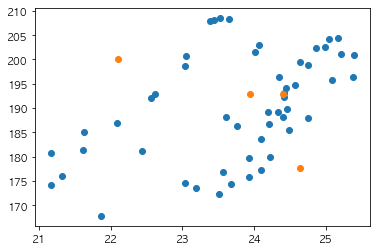

In [359]:
plt.scatter(arr5[:,0],arr5[:,2])
plt.scatter(Kmeans_x,Kmeans_y)
plt.show()

### k 각 데이터 오브젝트들은 가장 가까이 있는 평균값을 기준으로 묶인다. 

In [360]:
label=np.zeros(len(arr5))
dist=np.zeros((len(arr5),len(Kmeans)))
for i in range(len(arr5)):
    for j in range(k):
        dist[i,j]=math.sqrt((arr5[i,0]-Kmeans[j,0])**2+(arr5[i,2]-Kmeans[j,1])**2) # 유클리드 거리를 이용해 유사도 측정
for i in range(len(label)):
    label[i]=np.argmin(dist[i,:]) #유사한것 끼리 같은 레이블을 붙여준다.

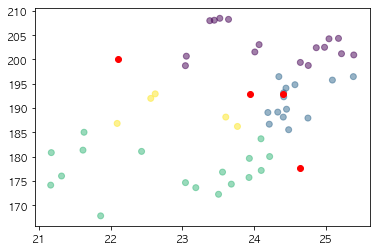

In [361]:
plt.scatter(arr5[:,0],arr5[:,2],c=label,alpha=0.5)
plt.scatter(Kmeans_x,Kmeans_y, c='red')
plt.show()

### k개의 클러스터의 중심점을 기준으로 평균값이 재조정된다

In [362]:
for i in range(k):
    sum_x=0;
    sum_y=0;
    sum_c=0;
    for j in range(len(label)):
        if(i==label[j]):
            sum_x+=arr5[j,0]
            sum_y+=arr5[j,2]
            sum_c+=1;
    Kmeans_x[i]=sum_x/sum_c;
    Kmeans_y[i]=sum_y/sum_c;
#여기서 오류 나면 에러가 난수 발생시 터무니없는 난수가 발생된거기에 다시 난수 과정을 반복해서 수행해 준다.

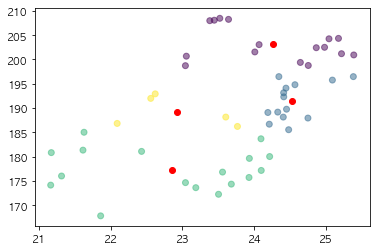

In [363]:
plt.scatter(arr5[:,0],arr5[:,2],c=label,alpha=0.5)
plt.scatter(Kmeans_x,Kmeans_y, c='red')
plt.show()

### 수렴할 때까지 반복한다.

In [364]:
Kmeans_=np.zeros((k,2))
label=np.zeros(len(arr5))
Err=np.zeros(k)
Kmeans=np.column_stack([Kmeans_x,Kmeans_y])
Err[:]=np.sqrt(np.sum(Kmeans[:]-Kmeans_[:]))
while Err.all()!=0: #에러율이 0일 될때 까지 반복
    dist=np.zeros((len(arr5),len(Kmeans)))
    for i in range(len(arr5)):
        for j in range(k):
            y=cmath.sqrt(((arr5[i,0]-Kmeans[j,0])**2)+((arr5[i,2]-Kmeans[j,1])**2)) # 유클리드 distance를 통한 클러스터링
            dist[i,j]=y.real
    for i in range(len(label)):
        label[i]=np.argmin(dist[i,:]) # 거리 가까운 순으로 label 
    Kmeans_=deepcopy(Kmeans) # 구한 중심점 복사
    for i in range(k):
        sum_x=0;
        sum_y=0;
        sum_c=0;
        for j in range(len(label)):
            if(i==label[j]):
                sum_x+=arr5[j,0]
                sum_y+=arr5[j,2]
                sum_c+=1;
        Kmeans[i][0]=sum_x/sum_c;
        Kmeans[i][1]=sum_y/sum_c;
        Err[:]=np.sqrt(np.sum(Kmeans[:]-Kmeans_[:])) #에러율 구하기

## 데이터 분석 결과

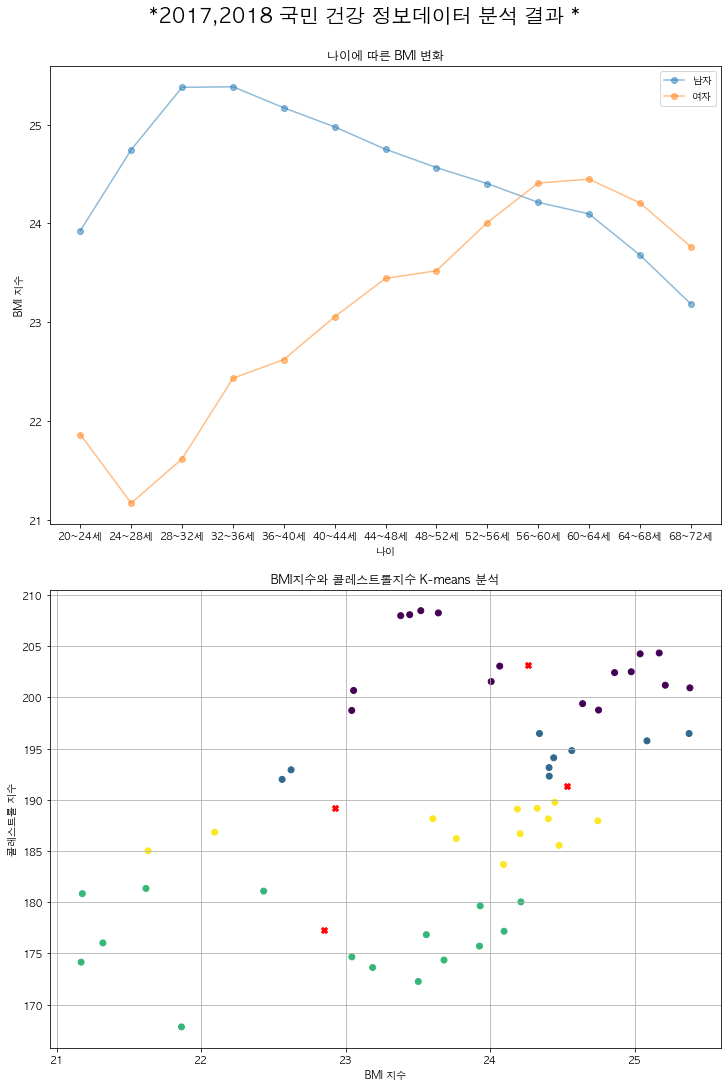

In [369]:
#그래프 그리기 
fig,ax=plt.subplots(2, 1, constrained_layout=True,figsize=(10, 5))
fig.suptitle('*2017,2018 국민 건강 정보데이터 분석 결과 *', fontsize=20)
ax[0].set_title('나이에 따른 BMI 변화')
ax[0].set_xlabel('나이')
ax[0].set_ylabel('BMI 지수')
ax[0].plot(name,age_m,alpha=0.5,label="남자",marker='o')
ax[0].plot(name,age_f,alpha=0.5,label="여자",marker='o')
ax[0].legend()
ax[0].figure.set_size_inches(10, 15)
ax[1].figure.set_size_inches(10, 15)
ax[1].scatter(arr5[:,0],arr5[:,2],c=label,alpha=1)
ax[1].set_title("BMI지수와 콜레스트롤지수 K-means 분석")
ax[1].set_xlabel("BMI 지수")
ax[1].set_ylabel("콜레스트롤 지수")
ax[1].scatter(Kmeans_x,Kmeans_y, marker='X',c='red',alpha=1)
ax[1].grid()
plt.show()